# AutoKeras

An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University. The goal of AutoKeras is to make machine learning accessible to everyone.
* https://github.com/keras-team/autokeras 
* https://autokeras.com 


## Tutorial Image Clasification
Para el ejemplo simple se utiliza la base de datos MNIST

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import autokeras as ak
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1*X GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=(1024*4))])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


## Preparacion de los datos

In [2]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
print (data.target_names)
class_names = data.target_names

['malignant' 'benign']


In [3]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3 ,random_state=1)

X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

### 1 TRIAL

In [4]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

In [5]:
# Feed the image classifier with training data.
dauto = clf.fit(X_train, y_train, epochs=10)

y_pred_autok = clf.predict(X_test)

accuracy_autok_df = metrics.accuracy_score(y_test, y_pred_autok)

# Evaluate the best model with testing data.
print("Accuracy Evaluate: {accuracy}".format(accuracy=clf.evaluate(X_test, y_test)))
print("Accuracy Score: {accuracy}".format(accuracy=accuracy_autok_df))


Trial 1 Complete [00h 00m 05s]
val_loss: 0.329738050699234

Best val_loss So Far: 0.329738050699234
Total elapsed time: 00h 00m 05s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.5364
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.7245
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.8619
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8675
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8932
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8782
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9120
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9227
Epoch 9/10
13/13 [============================

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

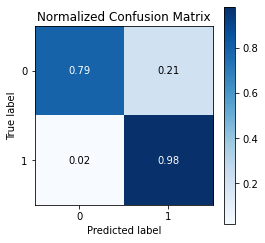

In [16]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_autok,
    normalize=True,
    figsize=(4,4))

In [17]:
print(classification_report(y_test,y_pred_autok))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        63
           1       0.89      0.98      0.93       108

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171



### 100 Fases/epochs

In [6]:
# Initialize the image classifier.
clf2 = ak.ImageClassifier(overwrite=True, max_trials=1)

In [7]:
# Feed the image classifier with training data.
dauto2 = clf2.fit(X_train, y_train, epochs=100)

y_pred_autok2 = clf2.predict(X_test)

accuracy_autok2_df = metrics.accuracy_score(y_test, y_pred_autok2)

# Evaluate the best model with testing data.
print("Accuracy Evaluate: {accuracy}".format(accuracy=clf2.evaluate(X_test, y_test)))
print("Accuracy Score: {accuracy}".format(accuracy=accuracy_autok2_df))

Trial 1 Complete [00h 00m 12s]
val_loss: 0.27494290471076965

Best val_loss So Far: 0.27494290471076965
Total elapsed time: 00h 00m 12s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5232
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6988
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.8580
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8758
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8769
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.9048
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2410 - accuracy: 0.9096
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.8931
Epoch 9/100
13/13 [===============

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

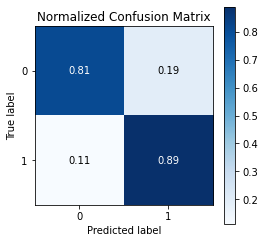

In [20]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_autok2,
    normalize=True,
    figsize=(4,4))

In [21]:
print(classification_report(y_test,y_pred_autok2))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        63
           1       0.89      0.89      0.89       108

    accuracy                           0.86       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.86      0.86      0.86       171



## Structured Data Classifier

In [16]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3 ,random_state=1)

In [7]:
clf3 = ak.StructuredDataClassifier(max_trials=1)

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json


In [8]:
clf3.fit(X_train, y_train, epochs=100)

y_pred_autok3 = clf3.predict(X_test)

accuracy_autok3_df = metrics.accuracy_score(y_test, y_pred_autok3)

# Evaluate the best model with testing data.
print("Accuracy Evaluate: {accuracy}".format(accuracy=clf3.evaluate(X_test, y_test)))
print("Accuracy Score: {accuracy}".format(accuracy=accuracy_autok3_df))

INFO:tensorflow:Oracle triggered exit
Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.6182 - accuracy: 0.6887
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4098 - accuracy: 0.9292
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2883 - accuracy: 0.9472
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2138 - accuracy: 0.9472
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1700 - accuracy: 0.9421
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.9389
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1229 - accuracy: 0.9423
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9631
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9704
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - los

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

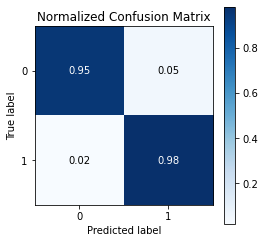

In [9]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_autok3,
    normalize=True,
    figsize=(4,4))

In [10]:
print(classification_report(y_test,y_pred_autok3))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [11]:
# Exportar Modelo
model = clf3.export_model()
print(model.summary())

#Save the model
model.save('breast_cancer_modelCustom3.h5')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 30)                0         
_________________________________________________________________
normalization (Normalization (None, 30)                61        
_________________________________________________________________
dense (Dense)                (None, 32)                992       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

## Graficas

<ipython-input-27-0c7a76453478>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  op.set_yticklabels(classificadores)


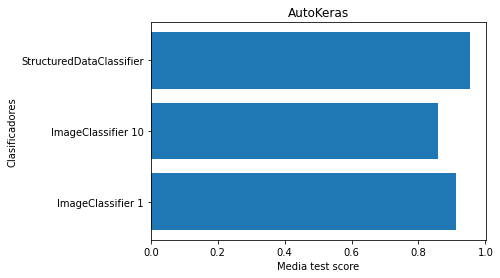

In [27]:
fig, op = plt.subplots()

classificadores = ("ImageClassifier 1","ImageClassifier 10","StructuredDataClassifier")
resultados = (accuracy_autok_df,accuracy_autok2_df,accuracy_autok3_df)
op.barh(classificadores,resultados,align='center')
op.set_yticklabels(classificadores)
op.set_xlabel("Media test score")
op.set_ylabel("Clasificadores")
op.set_title("AutoKeras")


plt.show()